# Novas perguntas

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('./../../Datasets/world-data-2023-01-com-labels.csv')
data.drop(data.columns[0], axis=1, inplace=True)

# clean column names
data.columns = [str(col).lower().replace('(', '').replace(')', '') \
                .replace(' ', '_').replace('\n', '').replace('/', '_') \
                .replace(':', '') \
                for col in data.columns]

# Cut countries in categories by GDP
# Obs: Na tentativa de cortar em 5 beans iguais ficaram EU e China no último bean e todos os outros (exceto Japão) no bean XS 
bins = [data['gdp'].min(), data['gdp'].quantile(.40), data['gdp'].quantile(.80), data['gdp'].quantile(.95), data['gdp'].max()]
labels = ['S', 'M', 'L', 'XL']
data['country_size'] = pd.cut(data['gdp'], bins=bins, labels=labels)

## Configs and functions

In [19]:
DARKGRID = "darkgrid"
sns.set_style(DARKGRID)

FIGSIZE=(10,10)


# Selecionando pares de variáveis com correlação positiva > limit
def select_best_corr(corr_df_, cut_limit=0.75):
    corr_matrix_unstacked = corr_df_.unstack().copy()
    corr_matrix_unstacked.sort_values(ascending=False, inplace=True)

    pos = [(col1, col2, corr_matrix_unstacked[col1, col2]) for col1, col2 in corr_matrix_unstacked.index \
           if corr_matrix_unstacked[col1, col2] > cut_limit and col1 != col2]
    
    neg = [(col1, col2, corr_matrix_unstacked[col1, col2]) for col1, col2 in corr_matrix_unstacked.index \
           if corr_matrix_unstacked[col1, col2] < (cut_limit * -1) and col1 != col2]
    
    return pos, neg


2. **Impacto da Atividade Agrícola no Meio Ambiente:** Analise como a percentagem de terra usada para atividades agrícolas está relacionada com emissões de CO2, área de floresta, entre outras variáveis ambientais.

In [10]:
# selecionar features que tenha a ver com esse assunto
agricultura_features = ['densityp_km2', 'agricultural_land_%', 'land_areakm2', 'co2-emissions', 'forested_area_%', 
      'gasoline_price', 'gdp', 'gross_primary_education_enrollment_%',
      'gross_tertiary_education_enrollment_%', 'minimum_wage', 'population', 
      'population_labor_force_participation_%', 'urban_population']
agricultura_df = data.loc[:, agricultura_features].copy()

In [11]:
agricultura_cm = agricultura_df.corr()
agricultura_cm.style.background_gradient()

,densityp_km2,agricultural_land_%,land_areakm2,co2-emissions,forested_area_%,gasoline_price,gdp,gross_primary_education_enrollment_%,gross_tertiary_education_enrollment_%,minimum_wage,population,population_labor_force_participation_%,urban_population
densityp_km2,1.000000,-0.033645,-0.053637,-0.019218,-0.032696,0.224237,-0.018790,0.003602,0.019196,0.249618,-0.017870,0.019065,-0.023438
agricultural_land_%,-0.033645,1.000000,-0.031372,0.061898,-0.434566,0.045731,0.051623,-0.046669,-0.109088,-0.002432,0.117165,-0.108046,0.101364
land_areakm2,-0.053637,-0.031372,1.000000,0.591510,-0.014244,-0.183163,0.550855,0.006032,0.223394,0.140740,0.446891,-0.006003,0.547687
co2-emissions,-0.019218,0.061898,0.591510,1.000000,-0.027207,-0.068345,0.916978,0.001930,0.157411,0.090509,0.810229,-0.013108,0.926331
forested_area_%,-0.032696,-0.434566,-0.014244,-0.027207,1.000000,0.123949,-0.000559,0.142624,-0.012679,-0.013233,-0.055554,0.141633,-0.034752
gasoline_price,0.224237,0.045731,-0.183163,-0.068345,0.123949,1.000000,-0.018332,-0.069283,0.148140,0.323638,-0.069534,-0.011484,-0.072518
gdp,-0.018790,0.051623,0.550855,0.916978,-0.000559,-0.018332,1.000000,-0.004106,0.214354,0.218397,0.632505,-0.006399,0.784549
gross_primary_education_enrollment_%,0.003602,-0.046669,0.006032,0.001930,0.142624,-0.069283,-0.004106,1.000000,-0.004799,-0.037568,0.039502,0.219505,0.028603
gross_tertiary_education_enrollment_%,0.019196,-0.109088,0.223394,0.157411,-0.012679,0.148140,0.214354,-0.004799,1.000000,0.452364,0.028720,-0.158007,0.100441
minimum_wage,0.249618,-0.002432,0.140740,0.090509,-0.013233,0.323638,0.218397,-0.037568,0.452364,1.000000,-0.027627,-0.073154,0.029364


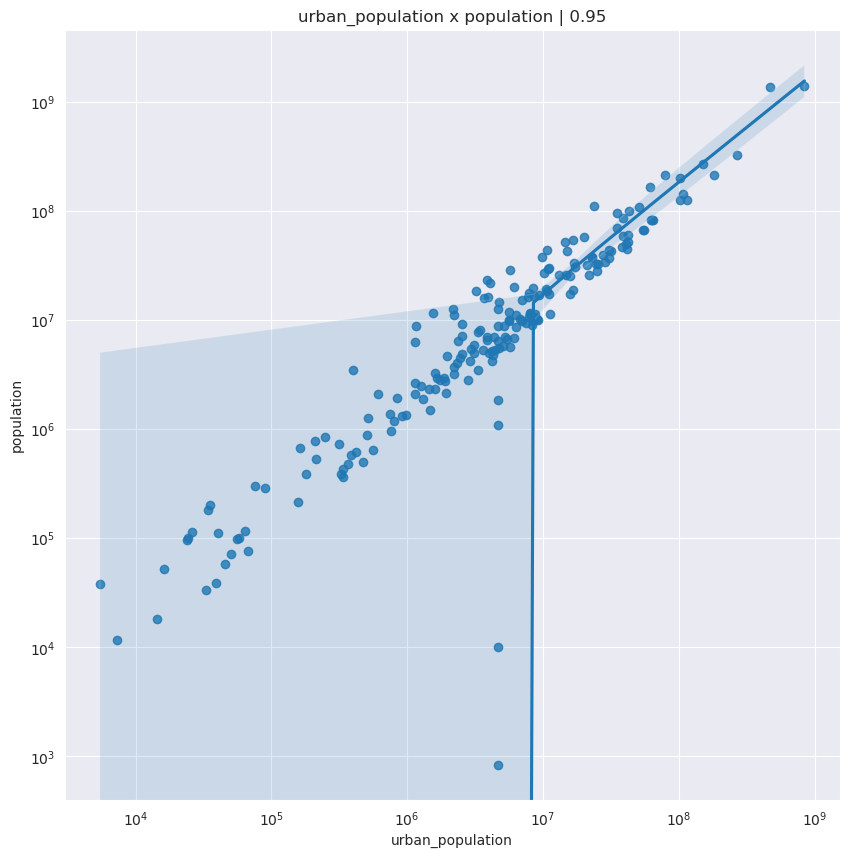

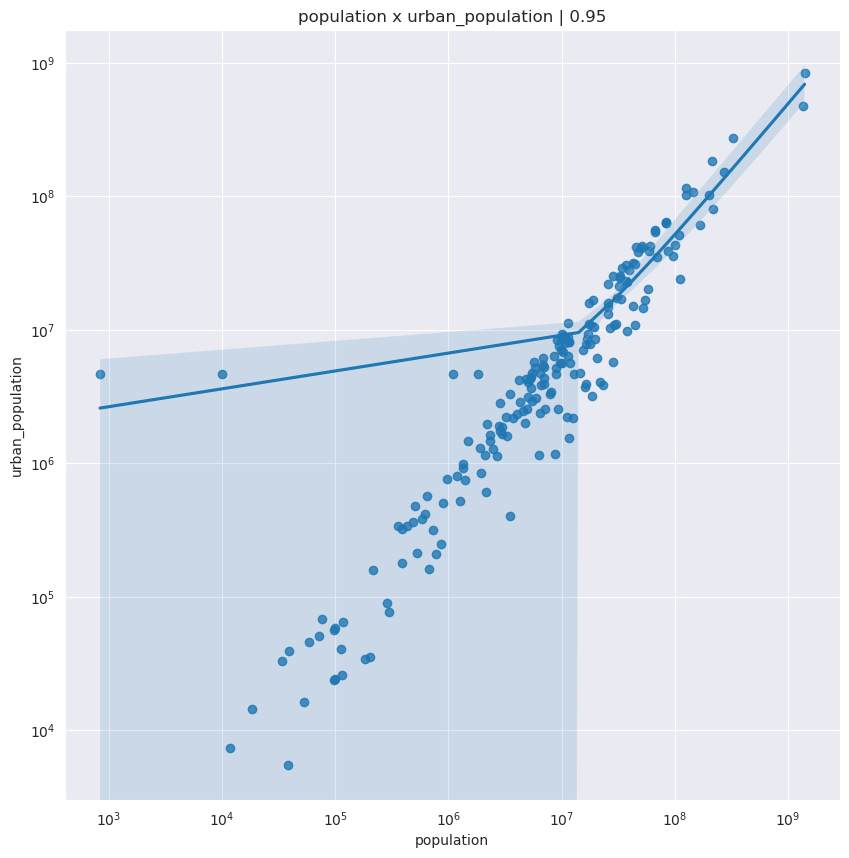

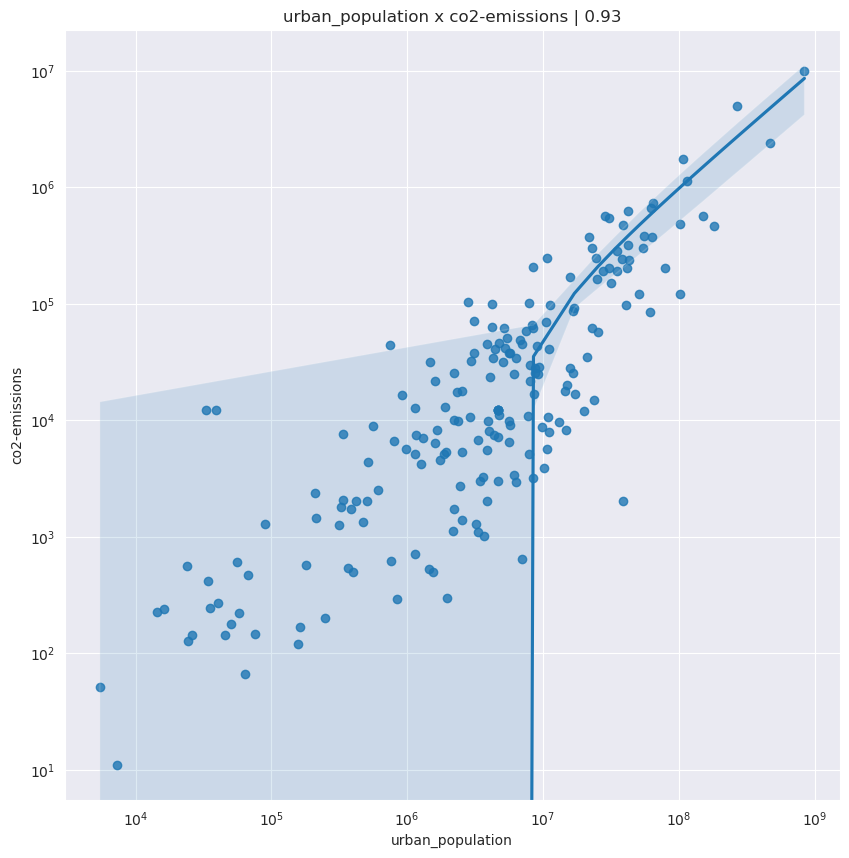

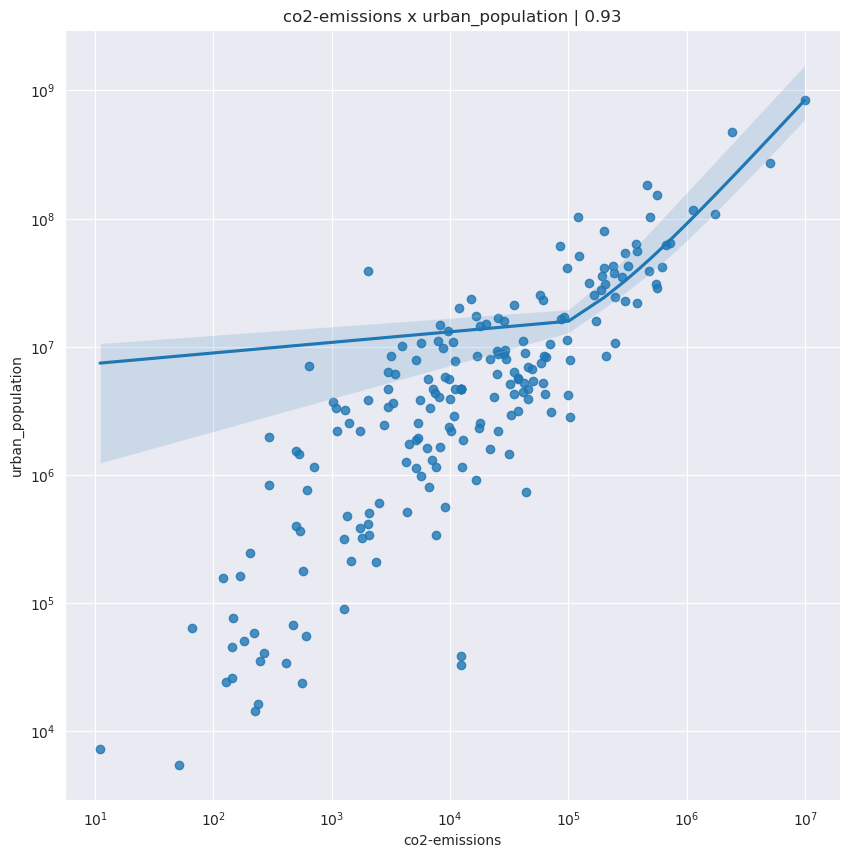

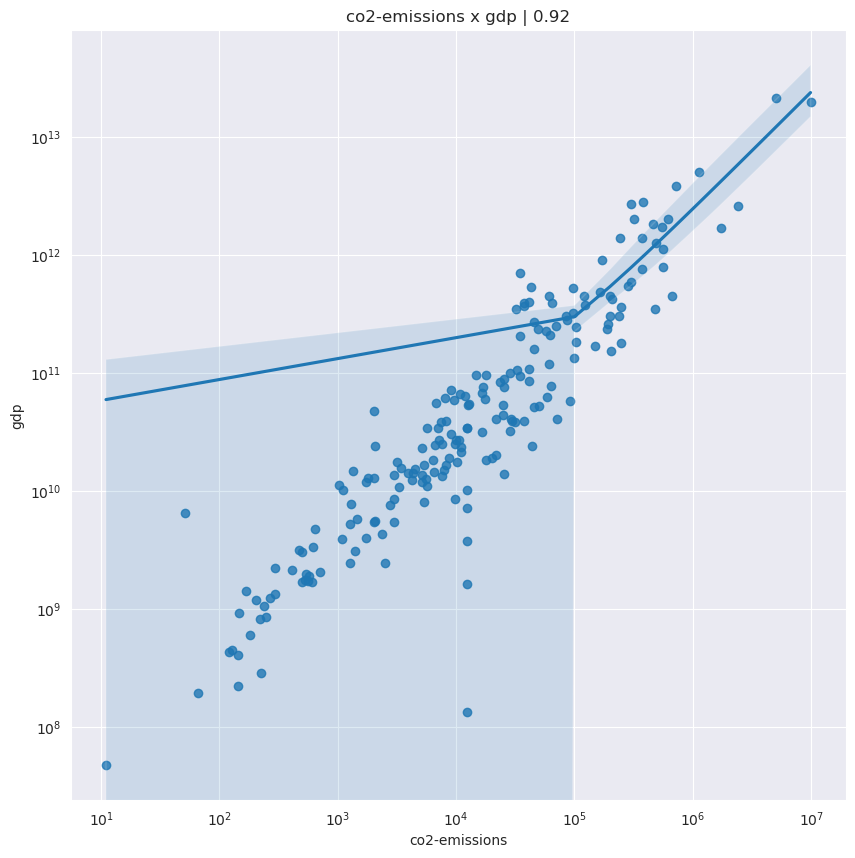

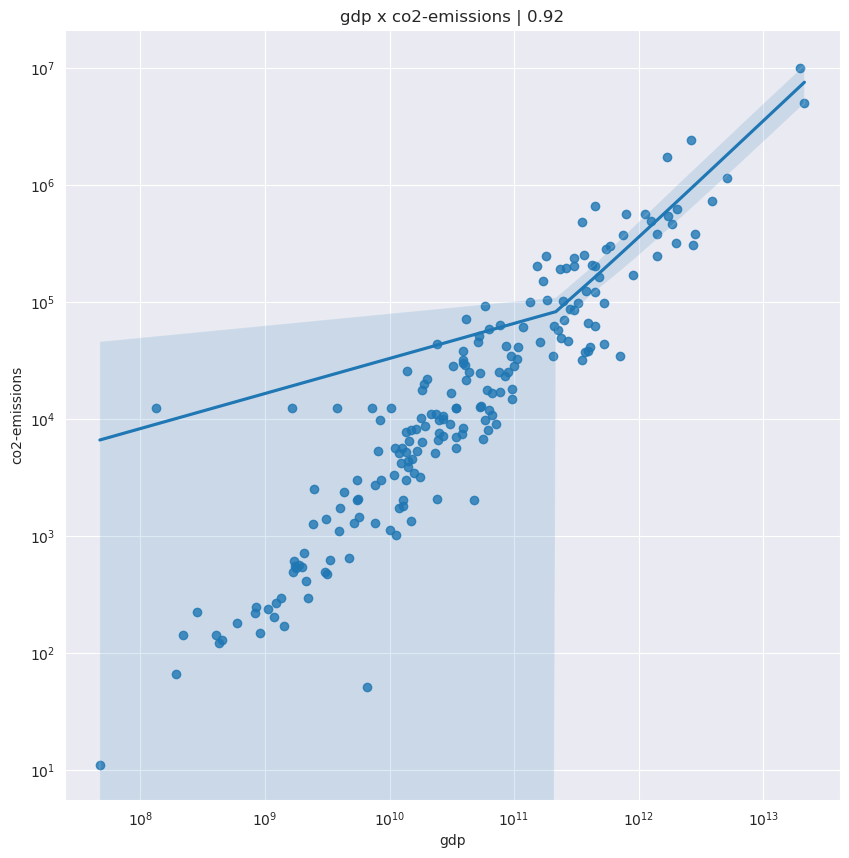

In [12]:
# correlações positivas 
for orientacao in [0, 1]:
       for correlacao in select_best_corr(agricultura_cm, .9)[orientacao]:
              plt.figure(figsize=FIGSIZE)
              sns.regplot(data=agricultura_df, x=correlacao[0], y=correlacao[1])
              plt.title(f"{correlacao[0]} x {correlacao[1]} | {round(correlacao[2], 2)}")
              plt.xscale('log')
              plt.yscale('log')
              plt.savefig(f'./images/{correlacao[0]}_{correlacao[1]}.png')
              plt.ioff()

In [13]:
plt.figure(figsize=FIGSIZE)
sns.scatterplot(data=data, x='life_expectancy', y='fertility_rate', \
    hue='country_size', style='country_size')
plt.title(f"Life Expectancy x Fertility Rate")
plt.xscale('log')
plt.yscale('log')
plt.savefig('./images/life_exp_fert_rate.png')

In [14]:
data.head()

,country,densityp_km2,agricultural_land_%,land_areakm2,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change_%,...,physicians_per_thousand,population,population_labor_force_participation_%,tax_revenue_%,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,country_size
0,Afghanistan,60.0,58.1,652230.0,323000.0,32.49,93.0,8672.0,149.90,2.3,...,0.28,38041754.0,48.90,9.3,71.4,11.12,9797273.0,33.939110,67.709953,M
1,Albania,105.0,43.1,28748.0,9000.0,11.78,355.0,4536.0,119.05,1.4,...,1.20,2854191.0,55.70,18.6,36.6,12.33,1747593.0,41.153332,20.168331,S
2,Algeria,18.0,17.4,2381741.0,317000.0,24.28,213.0,150006.0,151.36,2.0,...,1.72,43053054.0,41.20,37.2,66.1,11.70,31510100.0,28.033886,1.659626,M
3,Andorra,164.0,40.0,468.0,31000.0,7.20,376.0,469.0,125.34,2.3,...,3.33,77142.0,62.45,16.3,37.2,5.36,67873.0,42.506285,1.521801,S
4,Angola,26.0,47.5,1246700.0,117000.0,40.73,244.0,34693.0,261.73,17.1,...,0.21,31825295.0,77.50,9.2,49.1,6.89,21061025.0,-11.202692,17.873887,M


In [22]:
data.columns
# 3. **Desenvolvimento Econômico e Educação:** Explore a relação entre o PIB, matrícula em educação primária e terciária, e o percentual de matrícula bruta nessas áreas.

fields = ['country', 'country_size', 'densityp_km2', 'co2-emissions', 'cpi', 'cpi_change_%', 'gdp', 'gross_primary_education_enrollment_%',
         'gross_tertiary_education_enrollment_%', 'minimum_wage', 'population_labor_force_participation_%', 'tax_revenue_%', 'total_tax_rate', 'unemployment_rate', 'urban_population']

data2 = data[fields].copy()
data2.sample(10)

,country,country_size,densityp_km2,co2-emissions,cpi,cpi_change_%,gdp,gross_primary_education_enrollment_%,gross_tertiary_education_enrollment_%,minimum_wage,population_labor_force_participation_%,tax_revenue_%,total_tax_rate,unemployment_rate,urban_population
173,Thailand,L,137.0,283763.0,113.27,0.7,5.436500e+11,99.8,49.3,1.060,67.3,14.9,29.5,0.75,35294600.0
6,Argentina,L,17.0,201348.0,232.75,53.5,4.496634e+11,109.7,90.0,3.350,61.3,10.1,106.3,9.79,41339571.0
130,Oman,M,16.0,63457.0,113.53,0.1,7.698309e+10,103.4,38.0,4.330,72.4,2.5,27.4,2.67,4250777.0
174,East Timor,S,89.0,495.0,145.38,2.6,1.673540e+09,115.3,17.8,0.600,67.3,25.0,17.3,4.55,400182.0
100,Luxembourg,M,242.0,8988.0,115.09,1.7,7.110492e+10,102.3,19.2,13.050,59.3,26.5,20.4,5.36,565488.0
184,United Arab Emirates,L,118.0,206324.0,114.52,-1.9,4.211423e+11,108.4,36.8,1.045,82.1,0.1,15.9,2.35,8479744.0
76,Iceland,M,3.0,2065.0,129.00,3.0,2.418804e+10,100.4,71.8,1.045,75.0,23.3,31.9,2.84,339110.0
114,Mongolia,S,2.0,25368.0,195.76,7.3,1.385285e+10,104.0,65.6,0.650,59.7,16.8,25.7,6.01,2210626.0
106,Malta,S,1380.0,1342.0,113.45,1.6,1.478616e+10,105.0,54.3,5.070,56.5,26.2,44.0,3.47,475902.0
147,Saint Vincent and the Grenadines,S,284.0,220.0,109.67,2.3,8.253852e+08,113.4,23.7,1.160,65.9,25.4,37.0,18.88,58185.0


In [31]:
data2.iloc[:,2:].corr().style.background_gradient(cmap='Oranges')

,densityp_km2,co2-emissions,cpi,cpi_change_%,gdp,gross_primary_education_enrollment_%,gross_tertiary_education_enrollment_%,minimum_wage,population_labor_force_participation_%,tax_revenue_%,total_tax_rate,unemployment_rate,urban_population
densityp_km2,1.000000,-0.019218,-0.025382,-0.029640,-0.018790,0.003602,0.019196,0.249618,0.019065,-0.014490,-0.039397,-0.055211,-0.023438
co2-emissions,-0.019218,1.000000,-0.014447,-0.001040,0.916978,0.001930,0.157411,0.090509,-0.013108,-0.143687,0.063710,0.012696,0.926331
cpi,-0.025382,-0.014447,1.000000,0.894924,-0.023630,-0.159170,0.003105,-0.083903,0.019967,-0.056198,0.041498,0.126116,-0.005858
cpi_change_%,-0.029640,-0.001040,0.894924,1.000000,-0.007797,-0.124938,0.050153,-0.086926,-0.016684,-0.077064,0.114516,0.118692,0.010888
gdp,-0.018790,0.916978,-0.023630,-0.007797,1.000000,-0.004106,0.214354,0.218397,-0.006399,-0.116944,0.053455,0.037671,0.784549
gross_primary_education_enrollment_%,0.003602,0.001930,-0.159170,-0.124938,-0.004106,1.000000,-0.004799,-0.037568,0.219505,0.158629,-0.055105,-0.034002,0.028603
gross_tertiary_education_enrollment_%,0.019196,0.157411,0.003105,0.050153,0.214354,-0.004799,1.000000,0.452364,-0.158007,0.266423,-0.029027,0.038999,0.100441
minimum_wage,0.249618,0.090509,-0.083903,-0.086926,0.218397,-0.037568,0.452364,1.000000,-0.073154,0.217805,-0.036776,-0.052880,0.029364
population_labor_force_participation_%,0.019065,-0.013108,0.019967,-0.016684,-0.006399,0.219505,-0.158007,-0.073154,1.000000,-0.110572,-0.167444,-0.431414,-0.047780
tax_revenue_%,-0.014490,-0.143687,-0.056198,-0.077064,-0.116944,0.158629,0.266423,0.217805,-0.110572,1.000000,-0.081535,0.189511,-0.183282


leve correlação + () entre salário mínimo e matrícula bruta na educação terceária 0.452364	
Gross Tertiary Education Enrollment (%): Gross enrollment ratio for tertiary education.

In [20]:
correlacoes = select_best_corr(data.corr(), .75)
correlacoes

/tmp/ipykernel_8877/3242621637.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacoes = select_best_corr(data.corr(), .75)


([('fertility_rate', 'birth_rate', 0.9778290850910695),
  ('birth_rate', 'fertility_rate', 0.9778290850910695),
  ('population', 'urban_population', 0.9542611100342405),
  ('urban_population', 'population', 0.9542611100342405),
  ('urban_population', 'co2-emissions', 0.9263307679819908),
  ('co2-emissions', 'urban_population', 0.9263307679819908),
  ('gdp', 'co2-emissions', 0.916978279147576),
  ('co2-emissions', 'gdp', 0.916978279147576),
  ('cpi_change_%', 'cpi', 0.8949237803337273),
  ('cpi', 'cpi_change_%', 0.8949237803337273),
  ('population', 'armed_forces_size', 0.8772304358337647),
  ('armed_forces_size', 'population', 0.8772304358337647),
  ('infant_mortality', 'maternal_mortality_ratio', 0.8693203462373724),
  ('maternal_mortality_ratio', 'infant_mortality', 0.8693203462373724),
  ('infant_mortality', 'birth_rate', 0.8666773856519949),
  ('birth_rate', 'infant_mortality', 0.8666773856519949),
  ('urban_population', 'armed_forces_size', 0.852839070053562),
  ('armed_forces_siz

'life_expectancy', 'infant_mortality', -0.9181259622994663)})